[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fonnesbeck/Bios8366/blob/master/notebooks/Section1_1-Univeriate-and-Multivariate-Optimization.ipynb)

# Univariate and Multivariate Optimization

Первые две лекции курса будут служить достижению двух целей:

Познакомить учащихся с языком программирования Python.
Обзор важного класса алгоритмов статистических вычислений: оптимизация.
Для некоторых из вас одна или обе эти темы, вероятно, будут обзорными.

Давайте начнем с импорта пакетов, которые нам понадобятся для этого раздела.

Операторы импорта
Большая часть возможностей Python заключается в модулях, включенных в базовый Python или созданных сторонними производителями, которые содержат функции и классы, обеспечивающие ключевую функциональность для специализированных задач. Мы импортируем несколько из этих модулей, чтобы нам было проще выполнять задачи научных вычислений, такие как линейная алгебра, обработка данных и построение графиков. Предложение import перенесет модуль в текущий сеанс. Здесь мы также создаем псевдонимы для каждого модуля, чтобы к ним было проще обращаться.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> Например, пакет `seaborn` предоставляет некоторые высокоуровневые возможности построения графиков. Здесь мы вызовем функцию `set_context` из `seaborn`, которая позволяет нам регулировать размер меток, линий и других элементов графиков. Аргумент `'notebook'` говорит `seaborn` установить эти элементы так, чтобы они подходили для отображения в блокноте Jupyter.

In [33]:
# Set some Seaborn options
sns.set(context='notebook', style='ticks', palette='viridis')

## Оптимизация

Оптимизация — это процесс нахождения *минимума* или *максимума* функции. Рассмотрим функцию:

$$f: \mathbf{R} \rightarrow \mathbf{R}$$

где $f',f''$ непрерывны. Точка $x^*$ является *глобальным* максимумом, если:

$$f(x) \le f(x^*) \, \forall \, x$$

или *локальный* максимум, если:

$$f(x) \le f(x^*)$$ 
$$\forall \, x:|x-x^*| \lt \epsilon$$

Необходимые условия:

1. $f'(x^*) = 0$
2. $f''(x^*) \le 0$ (sufficient if $f''(x^*) \lt 0$)

Мы будем рассматривать методы **локального поиска**, которые генерируют ряд значений, сходящихся к максимуму:

$$x_0, x_1, x_2, \ldots \rightarrow \text{argmax}(f)$$

## Example: Maximum Likelihood

**Maximum likelihood** (ML) — это подход к оценке параметров статистических моделей. Полученные в результате оценки ML обладают хорошими теоретическими свойствами, поэтому этот метод широко используется. 

Существует масса теорий относительно ML. Здесь мы ограничимся механикой.

Скажем, у нас есть некоторые данные $y = y_1,y_2,\ldots,y_n$, распределенные согласно некоторому распределению:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i | \theta)$$
</div>

> ### Random number generation
> Модуль «numpy» содержит подмодуль «random» с функциями для генерации случайных значений из нескольких важных распределений вероятностей. Например, если мы хотим сгенерировать 100 значений из **распределения Пуассона** со средним значением 5, мы можем сделать следующий вызов функции:

In [3]:
y = np.random.poisson(5, size=100)

> Переменная `y` теперь является меткой, связанной с результирующими 100 значениями, которые мы выбрали. Они хранятся в структуре данных, называемой «ndarray».

In [4]:
type(y)

numpy.ndarray

> Мы можем произвольно обращаться к значениям этого массива, **индексируя** их, указывая значения или диапазоны значений в квадратных скобках. Например, чтобы получить первое значение:

In [34]:
y[0]

0.4284513774195057

> Обратите внимание, что Python начинает индексировать значения, начиная с нуля, а не с единицы. Чтобы извлечь подмассив, мы можем использовать *срез*, обозначаемый границами подмассива, разделенными двоеточием:

In [35]:
y[:10]

array([0.42845138, 0.40349214, 0.38055562, 0.35940942, 0.33985504,
       0.32172191, 0.30486273, 0.28914966, 0.27447123, 0.2607298 ])

Let's plot a histogram of the sampled values:

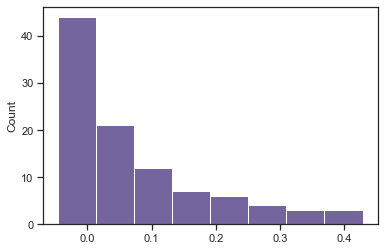

In [36]:
sns.histplot(y);

Произведение $\prod_{i=1}^n Pr(y_i | \theta)$ дает нам меру того, насколько **вероятно**, что параметры $\theta$ сгенерировали значения $y_1,\ldots, y_n$. Подгонка по методу максимального правдоподобия состоит в выборе подходящей функции $l= Pr(Y|\theta)$ для максимизации заданного набора наблюдений. Мы называем эту функцию *функцией правдоподобия*, потому что она является мерой того, насколько вероятны значения параметров, если модель верна; то есть «Учитывая эти данные, насколько вероятна эта модель?»

В приведенной выше модели данные были взяты из распределения Пуассона с параметром $\lambda =5$.

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

Таким образом, для любого заданного значения $y$ мы можем вычислить его вероятность.

> ### Функции
> Мы можем указать наши собственные функции, используя предложение `def`. Функция состоит из трех компонентов:
> * имя
> * аргументы
> * тело
>
> Если функция предназначена для предоставления вывода при вызове, необходимо указать оператор `return`.

In [37]:
def poisson_like(x, lam): 
    return np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

> Давайте попробуем вызвать нашу функцию с двумя произвольными значениями параметра среднего Пуассона lam и конкретным значением, для которого мы хотим вернуть значение правдоподобия:

In [38]:
lam = 6
value = 10

poisson_like(value, lam)

0.041303093412337726

Или, для численной стабильности, логарифмическое правдоподобие:

In [39]:
poisson_loglike = lambda x, lam: -lam + np.log(lam**x) - np.log(np.arange(x)+1).sum()

poisson_loglike(value, lam)

-3.1868178807949654

> ### `лямбда`-функции
> Полезной идиомой Python является функция `лямбда`. Это сокращение, позволяющее анонимно указывать однострочные функции.

**Совместное** логарифмическое правдоподобие — это просто сумма правдоподобия, рассчитанная для всех данных.

In [40]:
np.sum(poisson_loglike(yi, lam) for yi in y)

C:\Users\MARGAR~1\AppData\Local\Temp/ipykernel_27104/694072322.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(poisson_loglike(yi, lam) for yi in y)


-587.4988084318717

> ### Понимание
> Обратите внимание, как мы перебрали все значения `y` в приведенном выше примере. Это еще одна идиома Python, называемая «понимание», которая представляет собой конструкцию, позволяющую создавать последовательности из других последовательностей. Наиболее распространенным является **понимание списка**:
>
>  [x**2 + 5 for x in x_values]
> В нашем расчете правдоподобия понимание приводит к **генератору**, который выдает значения по мере необходимости, а не при создании структуры данных.
> ![понимание списка](images/listComprehensions.gif)

Мы можем сравнить это значение с логарифмической вероятностью для другого значения параметра.

In [41]:
lam = 8
np.sum([poisson_loglike(yi, lam) for yi in y])

-785.4916368442784

We can plot the likelihood function for any value of the parameter(s):

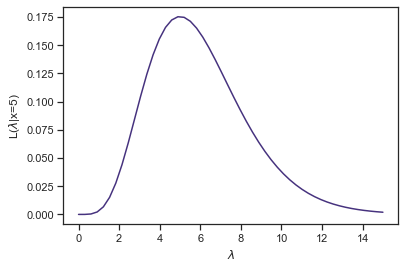

In [42]:
# Create a linear space of values between 0 and 15
lambdas = np.linspace(0,15)

# A data point
x = 5

plt.plot(lambdas, [poisson_like(x, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(x));

Чем функция правдоподобия отличается от функции распределения вероятностей (или массы)? Вероятность является функцией параметра(ов) **с учетом данных**, тогда как PDF (PMF) возвращает вероятность данных с учетом определенного **значения параметра**.

Вот PMF Пуассона для $\lambda=5$.

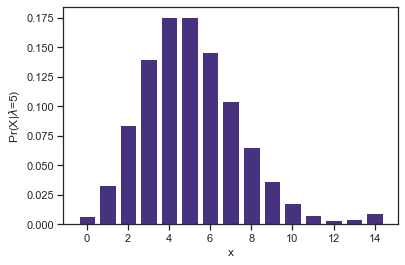

In [43]:
lam = 5
xvals = np.arange(15)

plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)');

Почему нас интересует функция правдоподобия?

Разумной оценкой истинного неизвестного значения параметра является та, которая **максимизирует функцию правдоподобия**. Таким образом, вывод сводится к задаче оптимизации.

### Пример: данные об осадках в Нэшвилле

Снова рассмотрим данные об осадках в Нэшвилле (`nashville_precip.txt`) в вашем каталоге данных, в которых записано ежемесячное количество осадков с 1871 по 2011 год. Поскольку это непрерывные положительные данные, их можно смоделировать с помощью гамма-распределения. Если это так, нам нужно максимизировать:

$$\begin{align}l(\alpha,\beta) &= \sum_{i=1}^n \log[\beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}] \cr 
&= n[(\alpha-1)\overline{\log(x)} - \bar{x}\beta + \alpha\log(\beta) - \log\Gamma(\alpha)]\end{align}$$

где $n = 2012 − 1871 = 141$, а черта показывает среднее значение по всем *i*. Мы выбираем $\alpha$ и $\beta$, чтобы максимизировать $l(\alpha,\beta)$.

Обратите внимание, что $l$ бесконечно, если любой $x$ равен нулю. У нас нет нулей, но у нас есть значение NA для одного из октябрьских данных.

### Поиск MLE

Чтобы найти максимум любой функции, мы обычно берем *производную* по максимизируемой переменной, устанавливаем ее равной нулю и находим решение для этой переменной.

$$\frac{\partial l(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = n\left(\log(\beta) -\frac{\Gamma(\alpha)'}{\Gamma(\alpha)} + \overline{\log(x)}\right) = 0$$

Итак, в целом находим:

$$l(\theta) = \left(\frac{d\theta}{d\theta_1}, \cdots, \frac{d\theta}{d\theta_n}\right) = \mathbf{0}$$

Таким образом, мы ищем корень уравнения счета.

В Python мы можем использовать Sympy для получения первой производной гамма-вероятности относительно $\beta$, используя символьное дифференцирование.

In [44]:
# via Sympy
import sympy as sy

a, b, x = sy.symbols('a b x')
gamma_dist = (a-1)*sy.log(x) - x*b + a*sy.log(b) - sy.log(sy.gamma(a))
sy.diff(gamma_dist, b)

a/b - x

Что можно решить как $\beta = \alpha/\bar{x}$. Однако подстановка этого значения в производную по $\alpha$ дает:

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\Gamma(\alpha)'}{\Gamma(\alpha)} = 0$$

Это не имеет решения в замкнутой форме. Мы должны использовать ***численную оптимизацию***!

## Метод деления пополам

Метод деления пополам выполняет численное нахождение корня для одномерных задач. Он работает с непрерывными функциями на $[a_0, b_0]$, где:

$$f^{\prime}(a_0)f^{\prime}(b_0)\le 0$$

что означает, что где-то существует локальный максимум (минимум) между двумя значениями.

Начальный интервал $[a_0, b_0]$ произвольный, если выполняется указанное выше условие.

Алгоритм итеративно сокращает интервал $[a_i,b_i]$, разделяя его и сохраняя подинтервал, для которого вышеуказанное условие все еще выполняется. Если существует несколько оптимумов, деление пополам найдет только один из них.

Из-за ряда факторов, включая ошибку округления при вычислениях с плавающей запятой, итерационные процедуры могут легко выполняться бесконечно. Чтобы избежать этого, мы указываем **правило остановки**, которое останавливает алгоритм на основе некоторых предопределенных критериев сходимости.

Поскольку мы ищем корень, один из подходов состоит в том, чтобы отслеживать сходимость $f^{\prime}((a_i + b_i)/2)$ к нулю. Однако, когда вероятность очень плоская, могут быть очень большие изменения в оценочном значении, даже если $f^{\prime}(x)$ невелико. Вместо этого мы должны отслеживать **разницу** значений от одной итерации к другой.

> **критерий абсолютной сходимости**:
>
> $$| x_{i+1} - x_{i} | \lt \epsilon$$
> 
> где $\epsilon$ — выбранный допуск.
>
> **критерий относительной сходимости**:
> 
> $$\frac{| x_{i+1} - x_{i} |}{|x_{i}|} \lt \epsilon$$
> 
> В целом:
>
> * если значения $x$ на порядки больше (меньше), чем $\epsilon$, абсолютная сходимость может прекратиться слишком поздно (скоро)
> * если решение слишком близко к нулю, относительная сходимость может стать нестабильной

Обратите внимание, что для метода деления пополам:

$$b_t - a_t = \frac{b_0 - a_0}{2^t}$$

что означает, что для данного $\epsilon$ нам требуется:

$$t > \log_2\left(\frac{b_0 - a_0}{\epsilon}\right)$$

Уменьшение $\epsilon$ в 10 раз означает увеличение $t$ на $\log_2(10) \приблизительно 3,3$.

Также разумно установить абсолютный лимит на количество итераций на случай, если алгоритм расходится или зацикливается.

> ### цикл while
> В приведенной ниже функции мы используем цикл while, который выполняет следующий блок кода до тех пор, пока указанное условие не перестанет быть истинным.
>
> ### Функции как аргументы
> Обратите внимание, что один из аргументов `bisection` должен быть функцией (функция, корень которой мы пытаемся найти). В Python функции являются объектами первого класса, и поэтому их можно назначать переменным, удалять, передавать в качестве аргумента или делать что-то еще, что вы можете делать с другим объектом, например с массивом данных.

In [45]:
class ConvergenceError(Exception): pass

def bisection(func, a, b, tol=1e-9, max_iter=100):

    # Check initial values
    if a >= b:
        raise ValueError('Right value must be larger than left')
    
    fa, fb = func([a, b])
    
    if fa*fb > 0:
        raise ValueError('No maximum between specified values')
    
    i = 0
    while (b - a) > tol:
        
        # More stable than c = (b + a)/2.
        c = a + (b - a)/2.
        fc = func(c)
        
        if fa*fc < 0:
            b,fb = c,fc
        else:
            a,fa = c,fc
            
        i +=1
        
        if i == max_iter:
            raise ConvergenceError('The algorithm did not converge in {0} iterations'.format(max_iter))
        
    return(a + (b - a)/2., i)

> ### Ошибки и исключения
> Информация об ошибках при выполнении кода Python предоставляется с помощью объекта `Exception`. **Объект** — это конкретный экземпляр **класса**, который представляет собой программную абстракцию, объединяющую связанные функции и атрибуты в единую структуру данных. Мы используем определенный **подкласс** `Exception` для обозначения того, что в нашу функцию передается неверное значение аргумента.
>
> Обратите внимание, что мы преднамеренно вызываем ошибки в этой функции через предложение `raise`. Зачем нам это делать?
>
> Мы также создаем специальный подкласс встроенного класса Exception, который будет использоваться, когда наш алгоритм не сходится, и назовем его ConvergenceError.

Чтобы применить этот алгоритм к данным об осадках, нам нужна функция для производной логарифмического правдоподобия по одному из параметров, в данном случае «бета».

Во-первых, давайте импортируем наши данные.

> ### Чтение табличных данных
> Наше первое использование `pandas` будет заключаться в импорте данных из текстового файла. Pandas включает в себя несколько функций `read_`, соответствующих распространенным форматам файлов. В этом случае мы импортируем таблицу значений осадков, хранящуюся в виде простого текстового файла со значениями, разделенными разным количеством пробельных символов. Аргумент `sep` ниже принимает любой символ, который может быть использован в качестве разделителя, а также **регулярное выражение**, которое мы используем здесь.

In [46]:
precip = pd.read_table("https://raw.githubusercontent.com/fonnesbeck/Bios8366/master/data/nashville_precip.txt", sep='\s+')

In [47]:
precip.isnull().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     1
Nov     0
Dec     0
dtype: int64

Поскольку максимизируя условия правдоподобия для данных, мы можем заранее вычислить пару значений, а именно логарифмическое среднее данных и среднее значение логарифмически преобразованных значений.

> ### Цепочка методов
> Обратите внимание, что расчеты выполняются с помощью **цепочки** вызовов метода один за другим с использованием «точечной нотации». Для `log_mean` мы сначала вычисляем среднее значение и применяем функцию `log` к этому значению, как только оно возвращается. Мы присваиваем значение параметру только тогда, когда возвращается окончательное интересующее количество.
>

In [48]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Вот расширенный пример цепочки методов, который изменяет форму, передискретизирует и суммирует набор данных мониторинга вспышек заболеваний в одной строке с использованием цепочки методов:

```python
confirmed_counts_2w = (confirmed_data
                        .groupby(['ONSET', 'AGE_GROUP'])
                        .size()
                        .unstack()
                        .reindex(dates_index)
                        .fillna(0)
                        .resample('2W')
                        .sum()
                        .pipe(check.is_shape, 
                              (28, len(age_groups))))
```

Мы увидим больше этого, когда начнем использовать пакет pandas для табличных данных.

> ### Функции SciPy
> Библиотека SciPy — один из основных пакетов, составляющих *научный стек* Python. Он предоставляет множество удобных и эффективных числовых процедур, таких как процедуры для численного интегрирования и оптимизации. Здесь мы используем его пси-функцию, которая является производной логарифма гамма-функции, оцениваемой при любом переданном ей значении (также называемом дигамма-функцией).

In [49]:
from scipy.special import psi

def dlgamma(m, month = 'Dec'): 
    return np.log(m) - psi(m) - log_mean[month] + mean_log[month]

Чтобы получить разумные отправные точки, есть несколько стратегий:

* построение графика функции и получение визуальной оценки
* предварительные оценки через другие приближенные решения
* методом проб и ошибок

Здесь мы построим функцию:

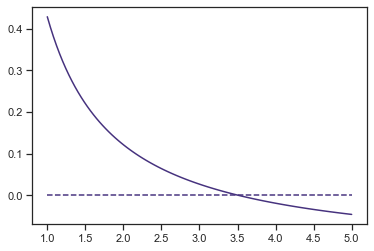

In [50]:
x = np.linspace(1, 5, 100)
y = dlgamma(x)

plt.plot(x, y)
plt.hlines(0, 1, 5, linestyles='--');

In [51]:
bisection(dlgamma, 2, 4, tol=1e-7)

(3.5189678966999054, 25)

## Порядок сходимости

Мы можем количественно оценить *эффективность* алгоритмов поиска корней, рассчитав их **порядок сходимости**.

Если алгоритм удовлетворяет $\lim_{i \rightarrow \infty} \epsilon_i = 0$, то параметр $\beta$ является порядком сходимости в соответствии с:

$$\lim_{i \rightarrow \infty} \frac{|\epsilon_{i+1}|}{|\epsilon_{i}|^{\beta}} = c$$

для некоторой константы $c$. Большие значения $\beta$ являются результатом более быстрой сходимости.

Обратите внимание, что обычно существует компромисс между скоростью и надежностью.

Метод деления пополам необычен тем, что он не соответствует критерию порядка сходимости, а указанное выше отношение, возможно, неограничено. На практике он имеет тенденцию к приблизительно линейной сходимости.

## Итерация с фиксированной точкой

Другой метод нахождения корней с помощью вычислений — это *итерация с фиксированной точкой*. **Фиксированная точка** функции — это точка, в которой оценка точки равна самой точке. Математически для некоторой функции $g:\mathbf{R} \Rightarrow \mathbf{R}$ неподвижной точкой является:

$$a \in \mathbf{R}: g(a) = a$$

Итак, если мы определим нашу функцию $f$ как:

$$f(x) = c(g(x)-x)$$

тогда мы можем найти корень $f$, когда найдем фиксированную точку $g$. Наоборот:

$$g(x) = c_1f(x) + x$$

Метод начинается с начального предположения $x_0$, из которого мы генерируем $x_1 = g(x_0)$, затем $x_2 = g(x_1)$ и т. д.

В общем случае это рекуррентное уравнение 1-го порядка:

$$x_{n+1} = g(x_{n})$$

Мы можем показать, что $x_n \rightarrow a$ является неподвижной точкой $g$.

$$a = \lim_{n \rightarrow \infty} x_{n+1} = \lim_{n \rightarrow \infty} g(x_n)$$
$$ = g(\lim_{n \rightarrow \infty} x_n) = a$$

следовательно, $a$ является неподвижной точкой $g$.

К сожалению, такое сближение происходит не всегда. Например, рассмотрим следующие функции:

$$g_1(x) = x^{1.5}, \, g_2(x) = x^{0.75}$$

оба $g_1, g_2$ имеют фиксированные точки в 1 (по проверке), но $g_1$ расходится.

В целом,

* алгоритм сходится, если $|g'(a)<1|$, и расходится в противном случае.
* начальное значение должно находиться в "окрестности" $x_0$, чтобы гарантировать сходимость.

На практике мы можем *сойтись* к $a$, не достигая его. Мы хотим остановиться, когда $x_n$ будет "достаточно близко":

$$ |x_n - x_{n-1}| \le \epsilon$$

### Упражнение: Гамма MLE

Реализуйте алгоритм с фиксированной точкой и используйте его для расчета гамма MLE для одного из месяцев осадков в Nas.hville.

In [52]:
# Write your answer here

## Метод Ньютона

Методы скобок, такие как разделение пополам, которое ограничивает корень последовательностью интервалов, длина которых постепенно уменьшается, являются медленными по сравнению с другими подходами. Гораздо более быстрый метод поиска корней — это **метод Ньютона**.

Если у нас есть функция $f$, дважды дифференцируемая, мы можем аппроксимировать корень ее производной, используя разложение в ряд Тейлора:

$$f^{\prime}(x^*) \approx f^{\prime}(x_i) + (x^* - x_i)f^{\prime\prime}(x_i) = 0$$

Мы можем аппроксимировать $f^{\prime}$ его касательной в $x_i$, а затем аппроксимировать корень $f^{\prime}$ корнем касательной:

> ### Графика с помощью `matplotlib`
> На иллюстративной диаграмме ниже показано, как пользовательское построение графиков может быть реализовано в `matplotlib`. Стандартные графики можно аннотировать текстом и фигурами с помощью низкоуровневого API.

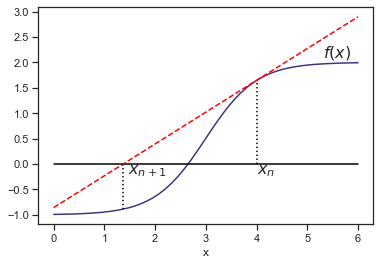

In [53]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.xlabel('x')
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plt.plot([0,6], [0,0], 'k-')
# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16);

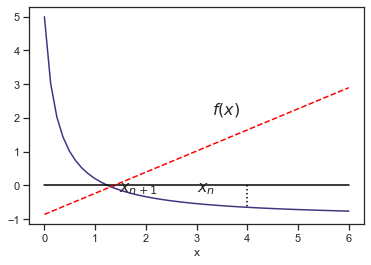

In [86]:
# some function
func = lambda x: 3./(2*x+0.5) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.xlabel('x')
plt.text(3.3, 2.1, '$f(x)$', fontsize=16)
# zero line
plt.plot([0,6], [0,0], 'k-')
# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(3, -.2, '$x_n$', fontsize=16)
# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')
# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16);

Если мы найдем $x^*$, это даст:

$$x^* = x_i - \frac{f'(x_i)}{f''(x_i)}$$

Однако этот результат является еще одним приближением, поэтому эта формула повторяется как:

$$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}$$

В конкретном случае проблемы MLE это становится:

$$\theta_{i+1} = \theta_i - \frac{l'(\theta_i)}{l''(\theta_i)}$$

### Конвергенция

Используя алгоритм Ньютона, $x_i \rightarrow x^*$ быстро при условии:

1. $f'(x^*)=0$
2. $f''(x^*)<0$
3. $f''$ is *Lipschitz-continuous* in the neighborbood of $x^*$

> Липшицева, если существует $k$ такое, что:
>
> $|f''(x) - f''(y)| \le k|x-y| \, \forall \, x,y$

Следующее реализует метод Ньютона в Python:

In [57]:
def newt(f, f_prime, x0, tol=1e-9, max_iter=100, **kwargs):
    """
    Алгоритм Ньютона-Рафсона для решения f (x) == 0
    
     Параметры
     ==========
     ф: функция
         функция одной переменной x.
     f_prime: функция
         функция, которая возвращает производную от f в точке x.
     х0: с плавающей запятой
         начальное предположение в фиксированной точке.
     tol: с плавающей запятой, необязательный
         минимальное расстояние последовательных догадок до остановки алгоритма
         (по умолчанию=1e-9).
     max_iter: целое число, необязательно
         максимальное количество итераций для сходимости к допуску, прежде чем
         алгоритм останавливается (по умолчанию=100).
        
    Returns
    =======
    x: float
        Final value of algorithm
    """
    
    # Initialize
    x = x0
    fx, fpx = f(x, **kwargs), f_prime(x, **kwargs)
    i = 0
    
    # Loop until conditions met
    while (abs(fx) > tol) and (i < max_iter):
        
        x -= fx/fpx
        fx, fpx = f(x, **kwargs), f_prime(x, **kwargs)
        i += 1
                
    if abs(fx) > tol:
        raise ConvergenceError('Algorithm failed to converge')

    return x

> ### Строки документации
> Простой способ документирования функций и классов в Python — включить **строку документации**. Любая строка, добавляемая непосредственно после объявления функции или класса, считается документацией и сообщается, когда для объекта вызывается `help`. Попытайся!

Чтобы применить алгоритм Ньютона-Рафсона, нам нужна функция, которая возвращает вектор, содержащий **первую и вторую производные** функции по интересующей нас переменной. Мы определили первую производную выше; вторая производная выглядит следующим образом:

In [58]:
from scipy.special import polygamma

dl2gamma = lambda m: 1./m - polygamma(1, m)

«полигамма» — это сложная функция дигамма-функции, которая получается, когда вы берете n-ю производную этой функции. Итак, здесь `полигамма(1, m)` – это первая производная дигаммы, которая является второй производной исходной гаммы.

In [59]:
# Alpha MLE for December
alpha_mle = newt(dlgamma, dl2gamma, 2, month = 'Dec')
alpha_mle

TypeError: <lambda>() got an unexpected keyword argument 'month'

А теперь подключите это обратно к решению для бета-версии:

$$ \Large{\beta  = \frac{\alpha}{\bar{X}}} $$

In [60]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

NameError: name 'alpha_mle' is not defined

Метод Ньютона также доступен нам через SciPy:

In [61]:
from scipy.optimize import newton

Для наиболее распространенных дистрибутивов SciPy также включает методы подбора через MLE:

In [62]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

(2.242751775315231, 0.6549460447018862, 1.570073932063466)

Однако это соответствие нельзя напрямую сравнивать с нашими оценками, потому что метод SciPy gamma.fit соответствует нечетной версии гамма-распределения с тремя параметрами. Если мы установим параметр местоположения равным нулю:

In [63]:
scipy_params = gamma.fit(precip.Dec, floc=0.)
scipy_params

(3.5189679152399784, 0.0, 1.1867801114824805)

Чтобы еще больше усложнить ситуацию, гамма-распределение SciPy использует параметризацию, которая использует инверсию бета для параметра масштаба.

In [64]:
1./scipy_params[-1]

0.8426160754841417

### Пример

На этой анимации показано, как метод Ньютона оценивает минимум простой полиномиальной функции $2x^4 + 3x^3 + 3$.

Во-первых, нам понадобится несколько функций: вот сам многочлен вместе с первыми двумя производными, которые мы будем использовать для вычисления первых двух членов ряда Тейлора:

In [65]:
f = lambda x: 2 * x**4 + 3 * x**3 + 3 

df = lambda x: 8 * x**3 + 9 * x**2

ddf = lambda x: 24 * x**2 + 18*x

taylorf = lambda x, dx: f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

Ниже приведен специальный тип функции, называемый **генератором**. Вместо того, чтобы просто возвращать значение, он возвращает объект-генератор, который возвращает следующее значение в серии вычисляемых значений по мере необходимости, используя оператор «yield» вместо «return».

Здесь мы используем генератор для реализации метода Ньютона.

> ### глобальные переменные
> Предложение `global` объявляет переменную внутри блока кода доступной во вложенных областях. Их следует использовать экономно!

In [66]:
def generator():
    global x
    while True:
        yield x
        delta = df(x) / float(ddf(x))
        if abs(delta) < 1e-10:
            return
        x = x - df(x) / float(ddf(x))

Эта функция будет обновлять расположение и текст анимированных объектов.

In [67]:
def update(ignore): #uses global variable x
    global x
    taylorCurve.set_data(x+dxs, taylorf(x,dxs))
    spot.set_data(x,f(x))
    dashedLine.set_data((x,x), (y0,y1))
    text.set_x(x + 0.1)
    text.set_text(str(np.round(x, 3)))
    return (taylorCurve, spot, dashedLine, text)

Произвольно инициализируем значение минимума:

In [68]:
x = 1.5 

Наконец, мы настраиваем сюжет и анимируем его:

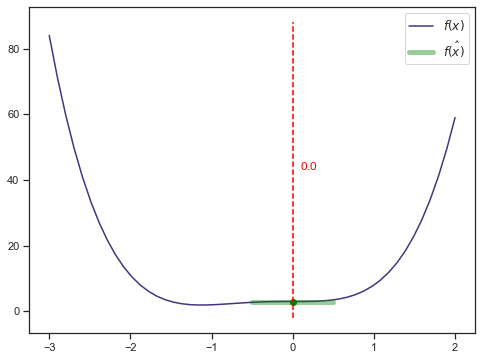

In [69]:
from IPython.display import HTML
from matplotlib import animation

# Initialize the figure and draw f(x)
fig, ax = plt.subplots(figsize=(8,6))
x_range = np.linspace(-3, 2)
ax.plot(x_range,f(x_range))

# Draw and save in global variables the Taylor approximation
dxs = np.linspace(-0.5, 0.5, num=100)                  
taylorCurve = ax.plot(x+dxs, taylorf(x,dxs), 'g-', linewidth=5, alpha=0.4)[0]
spot = ax.plot(x,f(x),'go')[0]         
y0,y1 = plt.ylim()
dashedLine = ax.plot([x,x],[y0,y1],'r--')[0]
text = ax.text(x, (y0+y1)*0.5, str(x), color='r')
ax.legend((r'$f(x)$', r'$\hat{f(x)}$'), fontsize='medium')
  
anim = animation.FuncAnimation(fig, update, generator)
HTML(anim.to_jshtml())

## Многомерная оптимизация

Мы можем захотеть найти максимум функции нескольких переменных:

$$f:\mathbf{R}^k \rightarrow \mathbf{R}$$

Предполагать:

* Частные производные первого и второго порядка существуют и всюду непрерывны.

$$\begin{align}
\mathbf{x} &= (x_1, x_2, \ldots, x_k) \cr
&= x_1 \mathbf{e}_1 + x_2 \mathbf{e}_2, + \ldots + x_k \mathbf{e}_k
\end{align}$$

где $\mathbf{e}_i$ — координатный вектор элемента $i$.

Обозначим $i$-ю частную производную по $x_i$ как $f_i(x)=\frac{\partial f(\mathbf{x})}{\partial x_i}$.

И мы определяем *градиент*:

$$\nabla f(\mathbf{x}) = (f_1(\mathbf{x}), \ldots, f_k(\mathbf{x}))'$$

И *гессиан*:

$$H(\mathbf{x})  = \left(
\begin{array}{c}
  \frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2 f(\mathbf{x})}{\partial x_1 \partial x_k}  \cr
  \vdots & \ddots & \vdots \cr
  \frac{\partial^2 f(\mathbf{x})}{\partial x_k \partial x_1} & \cdots & \frac{\partial^2 f(\mathbf{x})}{\partial x_k \partial x_k}
\end{array}\right)$$

### Кривизна

Для любого вектора, отличного от $\mathbf{0}$, *наклон* в точке $\mathbf{x}$ в направлении $\mathbf{v}$ определяется выражением:

$$\frac{\mathbf{v}' \nabla f(\mathbf{x})}{||\mathbf{v}||}$$

where $||\mathbf{v}||$ is the *euclidean norm* of $\mathbf{v}$.

$$||\mathbf{v}|| = \sqrt{v_1^2 + \ldots + v_k^2} = \sqrt{\mathbf{v} \cdot \mathbf{v}}$$

*Кривизна* в точке $\mathbf{x}$ равна:

$$\frac{\mathbf{v}' H(\mathbf{x}) \mathbf{v}}{||\mathbf{v}||^2}$$


$f$ имеет локальный максимум, если для всех $i=1,\ldots,k$ и достаточно малого $\epsilon$:

$$f(\mathbf{x} + \epsilon \mathbf{e}_i) \le f(\mathbf{x})$$

при условии, что:

$$\nabla f(\mathbf{x}) = \mathbf{0} = (0,\ldots,0)'$$

а наклон в точке $x$ в направлении $v$ равен $\le 0$ (*необходимое* условие). Это означает, что гессиан является отрицательно полуопределенным.

*Достаточным* условием является то, что наклон $v$ равен $\lt 0$ (отрицательно определенный Гессиан).

***Как найти максимум?***

### Самый крутой подъем/спуск

Метод наискорейшего подъема (спуска) представляет собой алгоритм итеративного поиска. Для функции $f:\mathbf{R}^k \rightarrow \mathbf{R}$ с непрерывными частными производными мы итерируем через:

$$\mathbf{x}_{i+1} = \mathbf{x}_i + \alpha \mathbf{v}_{i}^*$$

куда:

* $\alpha$ = positive scalar step size
* $\mathbf{v}_{i}^*$ = direction of largest slope at position $i$

$$\mathbf{v}_{i}^* = \text{argmax}_{\mathbf{v}} \frac{\mathbf{v}' \nabla f(\mathbf{x}_i)}{||\mathbf{v}||}$$

Вопросы:

1. Как найти это направление?
2. Насколько большой шаг мы делаем?

Нам нужно максимизировать наклон, поэтому рассмотрим частную производную по $v_i$:

$$\frac{\partial}{\partial v_j} \frac{\mathbf{v}' \nabla f(\mathbf{x})}{||\mathbf{v}||} = \frac{f_j(\mathbf{x})}{||\mathbf{v}||} - \frac{(\mathbf{v}' \nabla f(\mathbf{x}))v_j}{||\mathbf{v}||^3}$$

Приравняв это значение к нулю, мы получим:

$$v_j \propto f_j(\mathbf{x})$$

откуда следует, что в точке $\mathbf{x}$ направление с наибольшим наклоном равно $\nabla f(\mathbf{x})$. Итак, самый крутой подъем это:

$$\mathbf{x}_{x+1} = \mathbf{x}_i + \alpha \nabla f(\mathbf{x}_i)$$

Каков подходящий размер шага $\alpha$?

* слишком большой, и мы рискуем превзойти максимум
* слишком мал, и поиск неэффективен

Мы хотим выбрать $\alpha$ для максимизации:

$$g(\alpha) = f(\mathbf{x}_i + \alpha \nabla f(\mathbf{x}_i))$$

Мы уже знаем, как оптимизировать одномерные функции!

Условия остановки могут включать:

* $||\mathbf{x}_i - \mathbf{x}_{i-1}|| \le \epsilon$
* $|f(\mathbf{x}_i) - f(\mathbf{x}_{i-1})| \le \epsilon$
* $||\nabla f(\mathbf{x}_i)|| \le \epsilon$

для некоторого малого значения допуска $\epsilon$.

### Псевдокод

Собрав все вместе, наш алгоритм наискорейшего подъема должен выглядеть примерно так:

1. Инициализировать $\mathbf{x}_0$ and $\mathbf{x}_1$
2. Инициализировать счетчик $i=1$
3. Пока $f(\mathbf{x}_i) - f(\mathbf{x}_{i-1}) \gt \epsilon$:

    * $\mathbf{x}_{i-1} \leftarrow \mathbf{x}_i$
    * Найдите оптимальный размер шага
    * Рассчитать новый $\mathbf{x}_i = \mathbf{x}_{i-1} + \alpha \nabla f(\mathbf{x}_{i-1})$
    * Увеличение $i$

Функция ниже реализует градиентный спуск в Python, опять же используя **генератор**.

> ### Экземпляры класса NumPy
> Вы можете заметить странный синтаксис `r_` ниже. Это не функция (обратите внимание на квадратные скобки), хотя и ведет себя как таковая. `r_` — это **экземпляр класса**, который используется для объединения последовательностей в синтаксисе, подобном Matlab. Когда используется индексация с использованием квадратных скобок, вызывается метод `__getitem__`, связанный с этим классом. В этом случае `__getitem__` объединяет переданные значения, а не использует их в качестве индексов.
> Другими словами... это ВЗЛОМ.

In [70]:
from scipy import optimize

def gradient_descent(init_loc, f, f_prime, step=None):
    
    x_i, y_i = init_loc

    for i in range(1, 100):
        fxy = (f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if step is None:
            # Compute a step size using a line_search
            step = optimize.line_search(f, f_prime,
                                np.r_[x_i, y_i], -np.r_[dx_i, dy_i],
                                np.r_[dx_i, dy_i], c2=.05)
            step = step[0]
            
        x_i += -step*dx_i
        y_i += -step*dy_i
        
    return x_i, y_i, fxy

В качестве простого примера мы можем использовать градиентный спуск, чтобы найти пик квадратичной функции с различными условиями.

> ### Вложенные функции
> Ниже приведена функция, которая возвращает две функции. Ранее мы видели, что функции можно передавать в качестве аргументов другим функциям; так же они могут быть созданы и возвращены другими функциями. Здесь мы делаем это, потому что функции должны быть параметризованы перед их использованием.

In [71]:
def quad(epsilon, ndim=2):
    
    def f(x):
        y = np.array(x)*np.power(epsilon, np.arange(ndim))
        return .33*np.sum(y**2)

    def f_prime(x):
        scaling = np.power(epsilon, np.arange(ndim))
        y = np.array(x)*scaling
        return .33*2*scaling*y

    return f, f_prime

Мы указываем минимальное начальное предположение и запускаем наш алгоритм градиентного спуска:

In [72]:
x0, y0 = 1.6, 1.1
f, f_prime = quad(0.8)

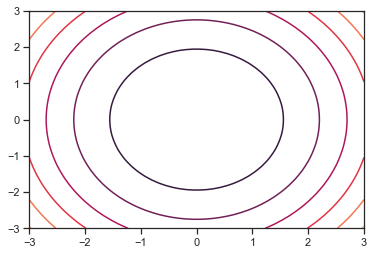

In [73]:
xvals = np.linspace(-3, 3)
yvals = np.linspace(-3, 3)
plt.contour(xvals, yvals, np.array([[f((x,y)) for x in xvals] for y in yvals]))

In [74]:
gradient_descent([x0, y0], f, f_prime)

(-4.565675398057117e-120, 1.2392182190653183e-49, 3.161134144331188e-98)

### Упражнение

Измените функцию градиентного спуска, чтобы сохранить значения, сгенерированные на каждом шаге оптимизации, и обеспечить подходящие условия для остановки, а не произвольно повторять 100 шагов. Функция должна вернуть таблицу (назовем ее `gd_output`) значений для x, y и f((x,y)).

In [75]:
## Write your answer here

### Алгоритм Нелдера-Мида

Хотя в нашем распоряжении имеется множество многомерных методов оптимизации на основе градиента, для многих интересующих задач первая и вторая производные могут быть недоступны. **Симплексный алгоритм Нелдера-Мида** — это альтернативный подход, в котором вместо градиентного восхождения используется прямой поиск. У него есть пара преимуществ:

- не требует производных
- может оптимизировать (минимизировать) вектор параметров

Он работает путем уточнения симплекса, обобщения интервалов и треугольников на многомерные пространства, чтобы заключить в скобки минимум.

Поскольку он не основан на градиентах, Нелдер-Мид является надежным, когда целевая функция не является гладкой, хотя для гладких функций он работает медленнее.

In [76]:
def rosenbrock(x):
    y = 4*x
    y[0] += 1
    y[1:] += 3
    return np.sum(.5*(1 - y[:-1])**2 + (y[1:] - y[:-1]**2)**2)

Функция `fmin` SciPy реализует Nelder-Mead.

> ### Обратные вызовы
> Несколько алгоритмов оптимизации SciPy реализуют **обратные вызовы**. Обратный вызов — это функция, которая передается в качестве аргумента другой функции, которая, как ожидается, вызовет (выполнит) аргумент в какое-то удобное время. Здесь это позволяет нам отслеживать промежуточные значения при оптимизации.

In [77]:
from scipy import optimize

def nelder_mead(f, x0):
    output = []
    
    def store(X):
        output.append([X[0], X[1], f(X)])
        
    optimize.fmin(f, x0, callback=store, ftol=1e-12)
    
    return np.array(output)

In [78]:
nm_output = nelder_mead(rosenbrock, np.array([x0, y0]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 151


In [79]:
def plot_opt(output, f):
    
    all_x_i, all_y_i, all_f_i = output.T
    
    x_min, x_max = -1, 2
    y_min, y_max = 2.25/3*x_min - .2, 2.25/3*x_max - .2
    
    levels = dict()
    
    # A formatter to print values on contours
    def super_fmt(value):
        if value > 1:
            if np.abs(int(value) - value) < .1:
                out = '$10^{%.1i}$' % value
            else:
                out = '$10^{%.1f}$' % value
        else:
            value = np.exp(value - .01)
            if value > .1:
                out = '%1.1f' % value
            elif value > .01:
                out = '%.2f' % value
            else:
                out = '%.2e' % value
        return out
    
    # Plot the contour plot
    if not max(all_y_i) < y_max:
        x_min *= 1.2
        x_max *= 1.2
        y_min *= 1.2
        y_max *= 1.2
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    x = x.T
    y = y.T
    
    X = np.concatenate((x[np.newaxis, ...], y[np.newaxis, ...]), axis=0)
    z = np.apply_along_axis(f, 0, X)
    log_z = np.log(z + .01)
    plt.imshow(log_z,
            extent=[x_min, x_max, y_min, y_max],
            cmap=plt.cm.gray_r, origin='lower',
            vmax=log_z.min() + 1.5*log_z.ptp())
    contours = plt.contour(log_z,
                        levels=levels.get(f, None),
                        extent=[x_min, x_max, y_min, y_max],
                        cmap=plt.cm.gnuplot, origin='lower')
    levels[f] = contours.levels
    plt.clabel(contours, inline=1,
                fmt=super_fmt, fontsize=14)
    
    plt.plot(all_x_i, all_y_i, 'b-', linewidth=2)
    plt.plot(all_x_i, all_y_i, 'k+')
    
    plt.plot([0], [0], 'rx', markersize=12)
    
    
    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

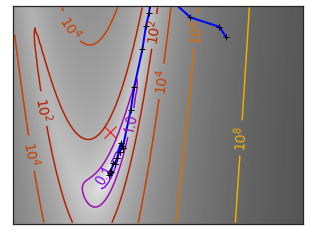

In [80]:
plot_opt(nm_output, rosenbrock)

### Пример: усеченное распределение

Предположим, что мы наблюдаем $Y$, усеченную снизу в $a$ (где $a$ известно). Если $X$ — это распределение нашего наблюдения, то:

$$ P(X \le x) = P(Y \le x|Y \gt a) = \frac{P(a \lt Y \le x)}{P(Y \gt a)}$$

(таким образом, $Y$ — исходная переменная, а $X$ — усеченная переменная)

Тогда X имеет плотность:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

Предположим, что $Y \sim N(\mu, \sigma^2)$ и $x_1,\ldots,x_n$ являются независимыми наблюдениями $X$. Мы можем использовать максимальную вероятность, чтобы найти $\mu$ и $\sigma$.

Во-первых, мы можем смоделировать усеченное распределение, используя оператор while, чтобы исключить выборки, которые не поддерживаются усеченным распределением.

<AxesSubplot:ylabel='Count'>

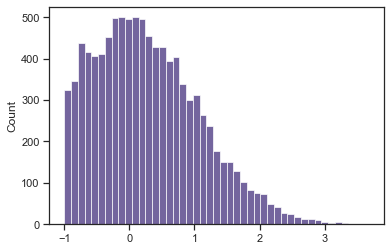

In [81]:
x = np.random.normal(size=10000)
a = -1
x_small = x < a
while x_small.sum():
    x[x_small] = np.random.normal(size=x_small.sum())
    x_small = x < a
    
sns.histplot(x)

Мы можем построить логарифмическую вероятность для этой функции, используя условную форму:

$$f_X(x) = \frac{f_Y (x)}{1−F_Y (a)} \, \text{for} \, x \gt a$$ 

In [82]:
from scipy.stats.distributions import norm

trunc_norm = lambda theta, a, x: -(norm.logpdf(x, theta[0], theta[1]) - 
            np.log(1 - norm.cdf(a, theta[0], theta[1]))).sum()

In [83]:
optimize.fmin(trunc_norm, np.array([1,2]), args=(-1, x))

Optimization terminated successfully.
         Current function value: 11057.408157
         Iterations: 43
         Function evaluations: 84


array([-0.02600117,  1.01779231])

В общем, имитация данных — отличный способ протестировать вашу модель, прежде чем использовать ее с реальными данными.

---
## References

Chapter 2 of [Givens, Geof H.; Hoeting, Jennifer A. (2012-10-09). Computational Statistics (Wiley Series in Computational Statistics)](http://www.stat.colostate.edu/computationalstatistics/)

[Python Scientific Lecture Notes](http://scipy-lectures.github.io)